In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [2]:
Pkg.add(["Plots","FFTW","LinearAlgebra","DSP","Convex","SCS"])

    Updating registry at `~/.julia/registries/General.toml`
    Updating registry at `~/.julia/registries/JSMLComponents.toml`
    Updating registry at `~/.julia/registries/JuliaComputingRegistry.toml`
    Updating registry at `~/.julia/registries/JuliaHubRegistry.toml`
   Resolving package versions...
  No Changes to `~/Documents/programming/BME-574-2024/Project.toml`
  No Changes to `~/Documents/programming/BME-574-2024/Manifest.toml`


In [3]:
using Plots, FFTW, DSP, LinearAlgebra, Random, Distributions, Convex, SCS

In [4]:
n = 4096
t = LinRange(0,1,n)

4096-element LinRange{Float64, Int64}:
 0.0, 0.0002442, 0.0004884, 0.000732601, …, 0.999267, 0.999512, 0.999756, 1.0

In [5]:
x = cos.(2 * 97 * π .* t) + cos.(2 * 777 * π .* t)
fx = fft(x)
psd = abs.(fx) .^ 2 ./n
f = fftfreq(n, 1/t[2])

4096-element Frequencies{Float64}:
   0.0
   0.999755859375
   1.99951171875
   2.999267578125
   3.9990234375
   4.998779296875
   5.99853515625
   6.998291015625
   7.998046875
   8.997802734375
   9.99755859375
  10.997314453125
  11.9970703125
   ⋮
 -11.9970703125
 -10.997314453125
  -9.99755859375
  -8.997802734375
  -7.998046875
  -6.998291015625
  -5.99853515625
  -4.998779296875
  -3.9990234375
  -2.999267578125
  -1.99951171875
  -0.999755859375

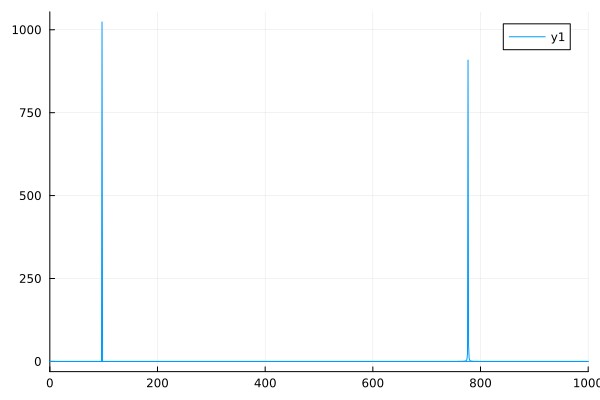

In [44]:
plot(f, psd, xlimit = (0,1000))

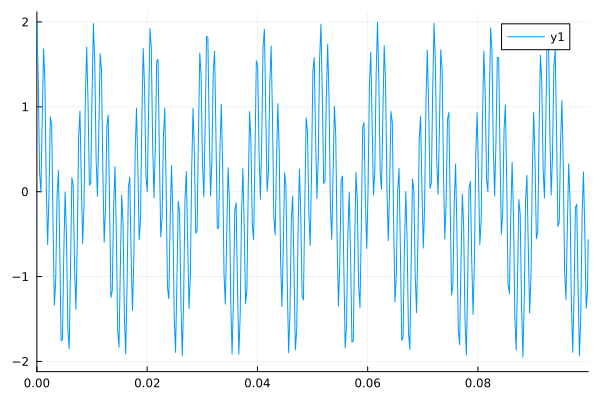

In [25]:
plot(t,x, xlimit=(0,0.1))

In [32]:
p = 128
perm = rand(1:n, p)
y = x[perm]
Psi = dct(LinearAlgebra.I(n))
Theta = Psi[perm,:]

128×4096 Matrix{Float64}:
 0.0   0.0           0.0           0.0          …   0.0           0.0
 0.0   0.0           0.0           0.0              0.0           0.0
 0.0   0.0           0.0           0.0              0.0           0.0
 0.0   0.0           1.81694e-18   0.0             -4.74957e-19   0.0
 0.0   0.0           0.0           0.0              0.0           0.0
 0.0   0.0          -1.77546e-18   0.0          …  -7.77119e-18   0.0
 0.0   0.0           0.0           0.0              0.0           0.0
 0.0   0.0          -1.6766e-18    0.0             -7.49665e-18   0.0
 0.0   0.0          -6.67739e-19   0.0              6.2131e-18    0.0
 0.0   1.77979e-18   0.0          -7.67748e-18      0.0           4.87969e-18
 0.0   6.45253e-19   0.0           8.77128e-19  …   0.0           1.53068e-19
 0.0   3.91566e-19   0.0           5.23968e-18      0.0          -7.65009e-18
 0.0   0.0           0.0           0.0              0.0           0.0
 ⋮                                      

In [33]:
maximum(Theta)

1.0000000000000004

In [11]:
# function to fit Lasso regression
function lasso(A,y,λ1,λ2)
    x = Variable(size(A)[2])
    problem = minimize(norm(A*x-y,2) + λ1*norm(x,1) + λ2*norm(x,2))
    solve!(problem, SCS.Optimizer; silent=true)
    return vec(evaluate(x))
end

lasso (generic function with 1 method)

In [40]:
s = lasso(Theta,y,100,0.0)

4096-element Vector{Float64}:
 -2.1085952492566108e-9
 -2.108563968271762e-9
  1.0527473332504174e-13
 -2.108592863707807e-9
  1.052459402571629e-13
 -2.10860462154706e-9
  1.0527905950022653e-13
 -2.108594573071126e-9
  1.0527999278658627e-13
 -2.108590459735712e-9
  1.0523367990657985e-13
 -2.1085933880241183e-9
  1.052682646179288e-13
  ⋮
  1.0527679596833693e-13
 -2.108565062659239e-9
  1.0528212191228358e-13
 -2.1085912563948846e-9
  1.0526939023948877e-13
 -2.1085938864093647e-9
  1.0526098508717332e-13
 -2.108594256576471e-9
  3.5332017239045766e-7
 -2.108594202045606e-9
  1.0526637582346973e-13
 -2.1085970050518354e-9

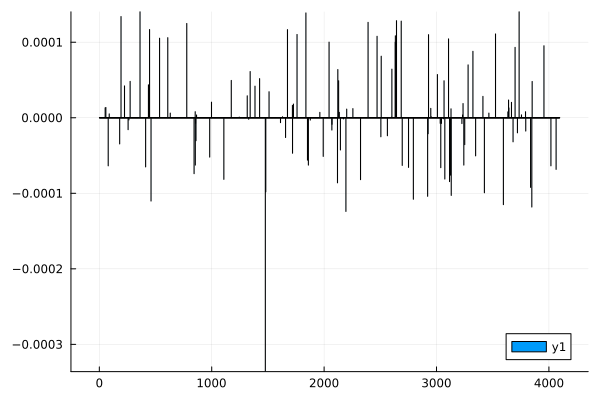

In [41]:
bar(s)

In [30]:
xrecon = idct(s)

4096-element Vector{Float64}:
  8.01776634405626e-6
  8.211013848228865e-6
 -4.1021735701780225e-6
  6.882772088939735e-6
  4.181309024976508e-6
 -5.083140878130387e-6
 -2.9238693290006277e-6
  1.5132012816924585e-5
  2.7608501292520468e-5
 -7.728505688638741e-6
 -1.0056737771727086e-5
  6.297579055701143e-6
  5.125210622660246e-6
  ⋮
  2.040454559802585e-6
  5.439294428573532e-6
 -9.130291526573058e-6
 -4.8525952035272335e-6
  8.280493260030332e-7
 -8.379812957003733e-6
 -2.590444399897398e-6
 -1.0478412548413048e-5
  3.1289814978344292e-6
 -6.901608156777073e-7
  8.101035875058335e-6
  2.129234998904273e-5

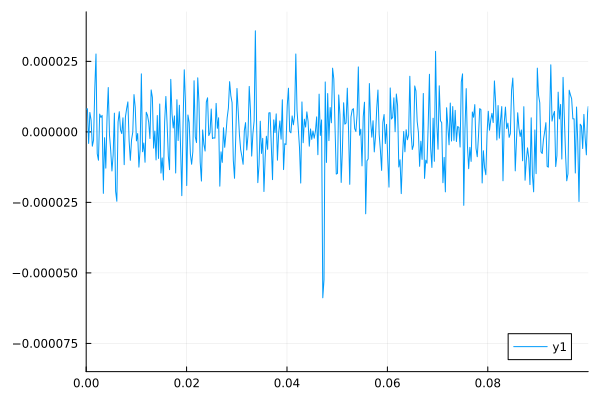

In [31]:
plot(t,xrecon,xlimit=(0,0.1))